In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url = "https://finance.naver.com/sise/"

page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

In [3]:
print(soup.find('span', id='KOSDAQ_now').text)
print(soup.find('span', id='KOSPI_now').text)
print(soup.find('span', id='KPI200_now').text)

998.01
3,259.48
434.00


In [5]:
my_stock = ['삼성전자', '카카오', '유한양행', 'NAVER']
my_stock_code = ['005930', '035720', '000100', '035420']

In [8]:
chk_url = 'https://finance.naver.com/item/main.nhn?code=000100'
page = urlopen(chk_url)
soup = BeautifulSoup(page, 'lxml')
soup.title

<title>유한양행 : 네이버 금융</title>

In [12]:
soup.find('p', class_='no_today').span.text

'63,200'

### span : 한 줄 영역 구분

In [21]:
list(soup.find('p', class_='no_today').children)

['\n',
 <em class="no_down">
 <span class="blind">63,200</span>
 <span class="no6">6</span><span class="no3">3</span><span class="shim">,</span><span class="no2">2</span><span class="no0">0</span><span class="no0">0</span>
 </em>,
 '\n']

In [7]:
my_stock_code = ['005930', '035720', '000100', '035420']
base_url = 'https://finance.naver.com/item/main.nhn?code='

for idx, code in enumerate(my_stock_code):
    all_url = base_url + code
    page = urlopen(all_url)
    soup = BeautifulSoup(page, 'lxml')
    
    ## 현재가
    cur_price = soup.find('p', class_='no_today').span.text
    print(my_stock[idx], cur_price)

삼성전자 80,900
카카오 143,500
유한양행 63,200
NAVER 388,000


#### 2-3 [추가] 관심 있는 종목 5개 선정, 코드 확인 후, 내가 필요로 하는 정보 6개 가져오기

In [55]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

comp_list = ['삼성전자', '카카오', '현대바이오', '셀트리온', 'NAVER']
code_list = ['005930', '035720', '048410', '068270', '035420']
list_1 = []

base_url = 'https://finance.naver.com/item/main.nhn?code='

for idx, code in enumerate(code_list):
    all_url = base_url + code
    page = urlopen(all_url)
    soup = BeautifulSoup(page, 'lxml')
    
    cur_price = soup.find('p', class_='no_today').span.text
    am = soup.find('div', id="middle", class_="new_totalinfo").findAll('dd')
    
    print(comp_list[idx], cur_price, '\n', am[10].text, '\n', 
         am[3].text, '\n', am[4].text, '\n', am[5].text, '\n', am[6].text, '\n',
         am[7].text, '\n', am[8].text, '\n', am[9].text)
    
    print('\n')

삼성전자 80,800 
 거래량 6,183,785 
 현재가 80,800 전일대비 하락 1,000 마이너스 1.22 퍼센트 
 전일가 81,800 
 시가 81,100 
 고가 81,300 
 상한가 106,000 
 저가 80,700 
 하한가 57,300


카카오 147,500 
 거래량 2,357,000 
 현재가 147,500 전일대비 상승 4,500 플러스 3.15 퍼센트 
 전일가 143,000 
 시가 142,000 
 고가 147,500 
 상한가 185,500 
 저가 140,500 
 하한가 100,500


현대바이오 38,650 
 거래량 1,366,836 
 현재가 38,650 전일대비 상승 550 플러스 1.44 퍼센트 
 전일가 38,100 
 시가 38,700 
 고가 39,650 
 상한가 49,500 
 저가 38,250 
 하한가 26,700


셀트리온 271,500 
 거래량 168,017 
 현재가 271,500 전일대비 보합 0  0.00 퍼센트 
 전일가 271,500 
 시가 270,000 
 고가 272,000 
 상한가 352,500 
 저가 268,500 
 하한가 190,500


NAVER 393,000 
 거래량 293,255 
 현재가 393,000 전일대비 상승 2,000 플러스 0.51 퍼센트 
 전일가 391,000 
 시가 389,500 
 고가 393,500 
 상한가 508,000 
 저가 385,000 
 하한가 274,000




### 네이버 댓글 정보 가져와보기

### 스파이더맨 영화정보 7페이지 정도 가져오기

In [76]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pattern = re.compile(r'\s+')

url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

sentence = soup.find('td', class_='title').text
print(sentence.split('\n')[5])
# sentence[2] = re.sub(pattern, '', sentence)
# print(sentence)

# # 또는
# sentence = ' \t\nhe   l\t\nlo  a   pp   le\t\t\n\n\n\n   '
# print(sentence.split())
# ''.join(sentence.split()) #'helloapple'

곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ 


In [85]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
# import re

# pattern = re.compile(r'\s+')

url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

sentence = soup.findAll('td', class_='title')
# sentence

for idx, i in enumerate(sentence):
    print(idx+1, i.text.split('\n')[5])

1 곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ 
2 이게 예술이 아니면 뭔가요? 
3 와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음 
4 명대사:헤이 
5 진짜 고퀄리티다.... 
6 스파이더맨 판권을 소니가 가져야 하는 이유 
7 갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지? 
8 영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ 
9 영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !! 
10 이게 진짜 현대예술이지 


### a태그로 접근하기
strip 함수를 이용해 whitespace 없애기

In [107]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pattern = re.compile(r'\s+')

url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

sentence = soup.findAll('td', class_='title')
# sentence

for idx, comment in enumerate(sentence):
    list_comment = comment.findAll('a')
    print(list_comment[1].get('onclick').split(',')[2])
#     print(list_comment)
#     for a in list_comment:
#         print(a.find('a', class_='report'))
        

 '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ'
 '이게 예술이 아니면 뭔가요?'
 '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음'
 '명대사:헤이'
 '진짜 고퀄리티다.... '
 '스파이더맨 판권을 소니가 가져야 하는 이유'
 '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?'
 '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ'
 '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!'
 '이게 진짜 현대예술이지'


### 5페이지 긁어오기

In [115]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page='
comments = []

for i in range(1, 6):
    total_url = url + str(i)
    page = urlopen(total_url)
    soup = BeautifulSoup(page, 'html.parser')

    sentence = soup.findAll('td', class_='title')
    print('<', i, '번째 페이지', '>')
    
    for idx, k in enumerate(sentence):
        comment = k.text.split('\n')[5]
        print(idx+1, comment)
        comments.append(comment)
        
    print()
    time.sleep(2)

< 1 번째 페이지 >
1 곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ 
2 이게 예술이 아니면 뭔가요? 
3 와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음 
4 명대사:헤이 
5 진짜 고퀄리티다.... 
6 스파이더맨 판권을 소니가 가져야 하는 이유 
7 갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지? 
8 영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ 
9 영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !! 
10 이게 진짜 현대예술이지 

< 2 번째 페이지 >
1 스파이더맨 작품들 중에 최고. 
2 스파이더맨 뉴 유니버스. 
3 영화의 색감이 너무 좋다 눈이 즐거운 영화! 
4 
5 애니메이션 자체로도 훌륭하지만, 전달하려는 메세지와 전달하는 방식도 매우 뛰어나다. 
6 마블에서 만든 실사판보다 더 괜찮음 스파이더맨 특유의 설정때문에 애니메이션이 더 잘 맞는듯 
7 존잼 3번이나 봄 ♡♡♡♡ 
8 꼭보셈 어벤져스보다 재밌음 
9 진짜 잘 만들었음. 영상미가 좋음. 
10 내가 스파이더맨 좋아하고 좀 안다 하시는분들은 더 재밋게 볼거같아요ㅋㅋㅋ 너무 재밌었음 

< 3 번째 페이지 >
1 생각한거 보대는 재밌다킬링타임용으로는 훌륭함 
2 전반적으로 좋으나 후반부가 너무 일본스러운 아기자기한 판타지 세계가 나와 고개를 돌리게 된다. 
3 원작 코믹스를 그대로 옮겨놓은 듯한 영상,연출이 너무 신선하고 재미있었다.꼭 보시길 추천한다. 
4 득특하고 창의적인 완벽한 스파이더맨 영화! 
5 
6 개인적으루 ost ㄹㅇ 미쳤음. 넘 좋당. 
7 그냥 미쳤음 모든게 새롭다 
8  애니메이션으로는 볼만 했음. 다만 실사 유니버스와는 별도로 계속 나왔으면 한다. 
9 스파이더맨으로 더 이상 뽑

In [116]:
import pandas as pd
import os

dict_doc = {"text": comments}

doc = pd.DataFrame(dict_doc)
doc.to_csv('스파이더맨_리뷰_06_17.csv', index=False)

os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'data',
 'dog_e.png',
 'LLAI_06_09.ipynb',
 'LLAI_06_14.ipynb',
 'LLAI_06_16.ipynb',
 'LLAI_06_17.ipynb',
 'url.csv',
 '스파이더맨_리뷰_06_17.csv',
 '의료용어.csv',
 '인기종목 정보.csv',
 '회사명과 웹사이트.csv']

### 워드 클라우드 시각화

In [120]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

In [121]:
f = open('스파이더맨_리뷰_06_17.csv', encoding='utf-8')
text = f.read()
f.close()

In [126]:
from matplotlib import rc
rc('font', family='NanumGothic')

(-0.5, 399.5, 199.5, -0.5)

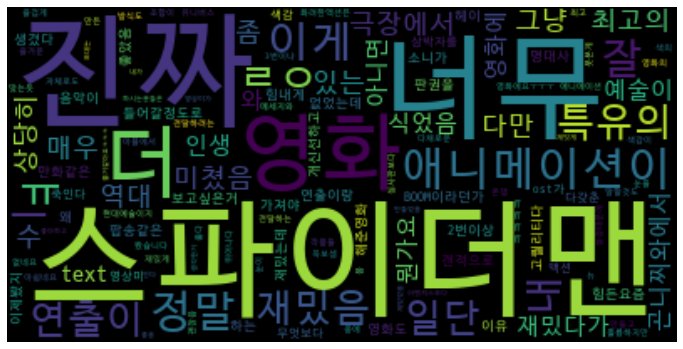

In [128]:
wcloud = WordCloud('./data/D2Coding-Ver1.3.2-20180524.ttf', max_words=1000, 
                  relative_scaling = 0.2).generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')

### 오늘의 실습
01. 영화를 하나 정해서 리뷰를 50페이지 정도 가지고와서 csv파일에 내용을 저장한다.
02. 해당 csv파일을 불러와 워드 클라우드 시각화를 실행한다.
03. slack에 한 내용(capture)을 공유한다.
04. 구글드라이브 체크

In [144]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=181711&target=&page='
comments = []

for i in range(1, 51):
    total_url = url + str(i)
    page = urlopen(total_url)
    soup = BeautifulSoup(page, 'html.parser')

    sentence = soup.findAll('td', class_='title')
    print('<', i, '번째 페이지', '>')
    
    for idx, k in enumerate(sentence):
        comment = k.text.split('\n')[5]
#         print(idx+1, comment)
        comments.append(comment)
        
    print()
    time.sleep(1)

< 1 번째 페이지 >

< 2 번째 페이지 >

< 3 번째 페이지 >

< 4 번째 페이지 >

< 5 번째 페이지 >

< 6 번째 페이지 >

< 7 번째 페이지 >

< 8 번째 페이지 >

< 9 번째 페이지 >

< 10 번째 페이지 >

< 11 번째 페이지 >

< 12 번째 페이지 >

< 13 번째 페이지 >

< 14 번째 페이지 >

< 15 번째 페이지 >

< 16 번째 페이지 >

< 17 번째 페이지 >

< 18 번째 페이지 >

< 19 번째 페이지 >

< 20 번째 페이지 >

< 21 번째 페이지 >

< 22 번째 페이지 >

< 23 번째 페이지 >

< 24 번째 페이지 >

< 25 번째 페이지 >

< 26 번째 페이지 >

< 27 번째 페이지 >

< 28 번째 페이지 >

< 29 번째 페이지 >

< 30 번째 페이지 >

< 31 번째 페이지 >

< 32 번째 페이지 >

< 33 번째 페이지 >

< 34 번째 페이지 >

< 35 번째 페이지 >

< 36 번째 페이지 >

< 37 번째 페이지 >

< 38 번째 페이지 >

< 39 번째 페이지 >

< 40 번째 페이지 >

< 41 번째 페이지 >

< 42 번째 페이지 >

< 43 번째 페이지 >

< 44 번째 페이지 >

< 45 번째 페이지 >

< 46 번째 페이지 >

< 47 번째 페이지 >

< 48 번째 페이지 >

< 49 번째 페이지 >

< 50 번째 페이지 >



In [145]:
import pandas as pd
import os

dict_doc = {"text": comments}

doc = pd.DataFrame(dict_doc)
doc.to_csv('러브라이브_리뷰_06_17.csv', index=False)

os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'data',
 'dog_e.png',
 'LLAI_06_09.ipynb',
 'LLAI_06_14.ipynb',
 'LLAI_06_16.ipynb',
 'LLAI_06_17.ipynb',
 'url.csv',
 '귀멸의칼날_리뷰_06_17.csv',
 '달라스바이어스클럽_리뷰_06_17.csv',
 '러브라이브_리뷰_06_17.csv',
 '스파이더맨_리뷰_06_17.csv',
 '의료용어.csv',
 '인기종목 정보.csv',
 '회사명과 웹사이트.csv']

In [146]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

f = open('러브라이브_리뷰_06_17.csv', encoding='utf-8')
text = f.read()
f.close()

(-0.5, 399.5, 199.5, -0.5)

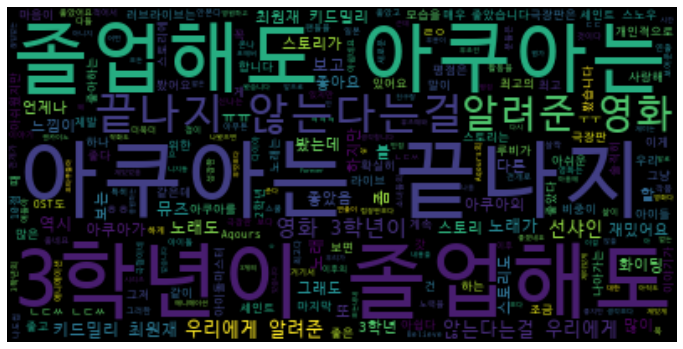

In [148]:
from matplotlib import rc
rc('font', family='NanumGothic')

wcloud = WordCloud('./data/D2Coding-Ver1.3.2-20180524.ttf', max_words=1000, 
                  stopwords=['진짜', '정말', '그', '너무', '그리고', '수', 
                            '연기가', '연기에', '연기를', '연기는', '영화가', '영화를',  
                            '더', '이', '다', '잘', '내가', '본', '없다', 
                            '있는', '것'], 
                   relative_scaling = 0.2).generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')